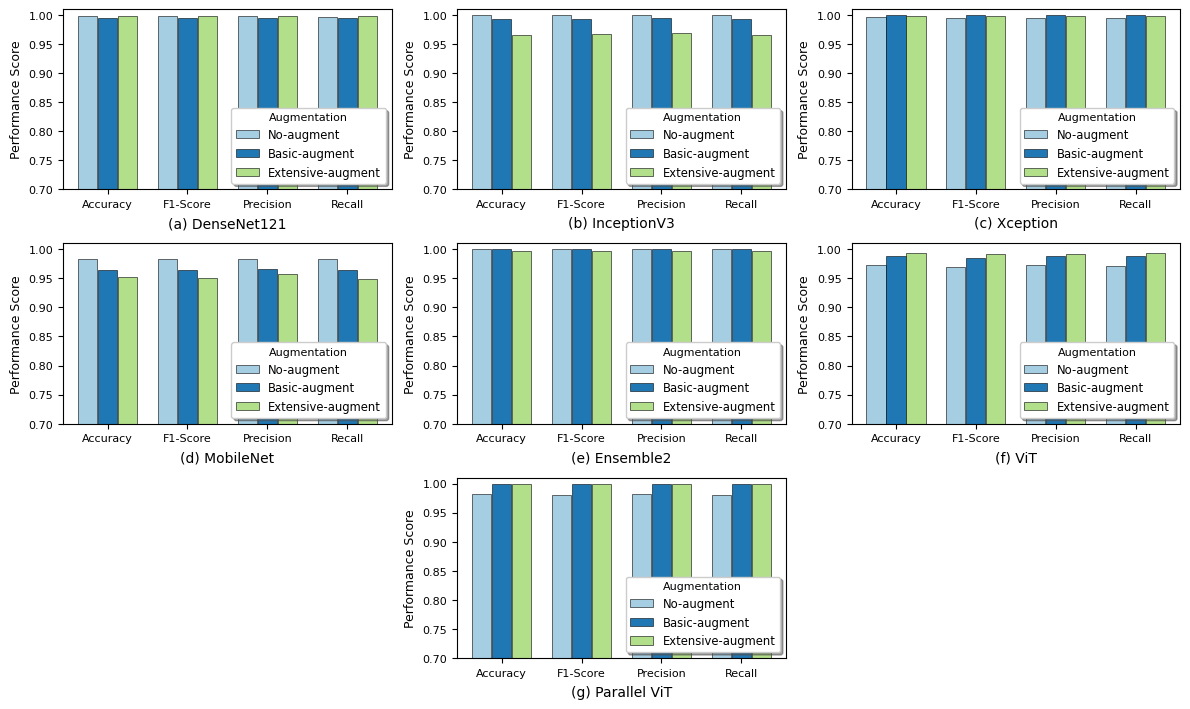

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl

MobileNet_df = pd.DataFrame([
    ['No-augment', 0.062872, 0.983993, 0.983354, 0.98366, 0.98315],
    ['Basic-augment', 0.09278, 0.964617, 0.96442, 0.96584, 0.96369],
    ['Extensive-augment', 0.127715, 0.95198, 0.95100, 0.956646, 0.948761]],
    columns=['Train data', 'Loss', 'Accuracy', 'F1-Score', 'Precision', 'Recall' ])

DenseNet121_df = pd.DataFrame([
    ['No-augment', 0.01262, 0.997473, 0.997348, 0.997417, 0.997296],
    ['Basic-augment', 0.011892, 0.994945, 0.99491, 0.99503, 0.99481],
    ['Extensive-augment', 0.008551, 0.998315, 0.998322, 0.998313, 0.998334]],
    columns=['Train data', 'Loss', 'Accuracy', 'F1-Score', 'Precision', 'Recall' ])

InceptionV3_df = pd.DataFrame([
    ['No-augment', 0.000673, 1, 1, 1, 1],
    ['Basic-augment', 0.020647, 0.99326, 0.99321, 0.99402, 0.99249],
    ['Extensive-augment',0.103291, 0.966302, 0.966895, 0.969262, 0.965216]],
    columns=['Train data', 'Loss', 'Accuracy', 'F1-Score', 'Precision', 'Recall'])

Xception_df = pd.DataFrame([
    ['No-augment', 0.008479, 0.995788, 0.995457, 0.995537, 0.995435],
    ['Basic-augment', 0.000351, 1, 1, 1, 1],
    ['Extensive-augment', 0.004672, 0.998315, 0.998109, 0.998148, 0.998084]],
    columns=['Train data', 'Loss', 'Accuracy', 'F1-Score', 'Precision', 'Recall' ])

original_vit_df = pd.DataFrame([
    ['No-augment', 0.083006, 0.972199, 0.970084, 0.972711, 0.971163],
    ['Basic-augment', 0.039388, 0.989048, 0.98529, 0.98905, 0.98879],
    ['Extensive-augment', 0.010119, 0.99326, 0.99229, 0.992565, 0.994135]],
    columns=['Train data', 'Loss', 'Accuracy', 'F1-Score', 'Precision', 'Recall' ])

parallel_vit_df = pd.DataFrame([
    ['No-augment', 0.041049, 0.981466, 0.981132, 0.981747, 0.980639],
    ['Basic-augment',0.002691, 0.999158, 0.998828, 0.999214, 0.999042],
    ['Extensive-augment', 0.002687, 0.999158, 0.99923, 0.99916, 0.999158]],
    columns=['Train data', 'Loss', 'Accuracy', 'F1-Score', 'Precision', 'Recall' ])

Ensemble2_df = pd.DataFrame([
    ['No-augment',0.027141, 1, 1, 1, 1],
    ['Basic-augment',0.002129, 1, 1, 1, 1],
    ['Extensive-augment', 0.009337, 0.99663, 0.996813, 0.996682, 0.996411]],
    columns=['Train data', 'Loss', 'Accuracy', 'F1-Score', 'Precision', 'Recall' ])

result_collection= {'MobileNet':MobileNet_df,  "DenseNet121":DenseNet121_df,
                      'InceptionV3':InceptionV3_df, 'Xception':Xception_df,
                      'original_vit':original_vit_df, 'parallel_vit':parallel_vit_df,
                      'Ensemble2':Ensemble2_df}

for model_key in result_collection:
    df_to_convert = result_collection[model_key]
    for col in ['Loss', 'Accuracy', 'F1-Score', 'Precision', 'Recall']:
        if col in df_to_convert.columns:
            df_to_convert[col] = pd.to_numeric(df_to_convert[col], errors='coerce')
    result_collection[model_key] = df_to_convert

fig_perf, axs_perf = plt.subplots(3, 3, figsize=(12, 8))
axs_perf = axs_perf.flatten()

datasets_for_grid = [
    ('(a) DenseNet121', result_collection.get('DenseNet121', pd.DataFrame())),
    ('(b) InceptionV3', result_collection.get('InceptionV3', pd.DataFrame())),
    ('(c) Xception', result_collection.get('Xception', pd.DataFrame())),
    ('(d) MobileNet', result_collection.get('MobileNet', pd.DataFrame())),
    ('(e) Ensemble2', result_collection.get('Ensemble2', pd.DataFrame())),
    ('(f) ViT', result_collection.get('original_vit', pd.DataFrame())),
    ('Empty', pd.DataFrame()),
    ('(g) Parallel ViT', result_collection.get('parallel_vit', pd.DataFrame())),
    ('Empty', pd.DataFrame())
]

for ax, (model_plot_name, df) in zip(axs_perf, datasets_for_grid):
    if not df.empty:
        melted_df = df.melt(id_vars='Train data', var_name='Metric', value_name='Value')
        colors = mpl.cm.Paired.colors

        all_original_metrics = melted_df['Metric'].unique()
        metrics_to_plot = [m for m in all_original_metrics if m != 'Loss']

        train_data_order = ['No-augment', 'Basic-augment', 'Extensive-augment']
        
        num_metrics_to_plot = len(metrics_to_plot)
        num_train_groups = len(train_data_order)
        
        bar_width = 0.24

        for i, metric in enumerate(metrics_to_plot):
            subset_metric = melted_df[melted_df['Metric'] == metric]
            for j, train_data_val in enumerate(train_data_order):
                subset_td = subset_metric[subset_metric['Train data'] == train_data_val]
                if not subset_td.empty:
                    ax.bar(i + j * 0.25 - 0.25, subset_td['Value'].values[0], width=bar_width, color=colors[j % len(colors)],
                           label=train_data_val if i == 0 else "", edgecolor='black', linewidth=0.4)

        ax.set_xticks(range(num_metrics_to_plot))
        ax.set_xticklabels(metrics_to_plot, fontsize=8)
        
        handles, labels = ax.get_legend_handles_labels()
        if handles:
            by_label = dict(zip(labels, handles))
            ax.legend(by_label.values(), by_label.keys(), title='Augmentation', loc='lower right', shadow=True, fontsize='small', title_fontsize='8')
        
        ax.set_ylabel('Performance Score', fontsize=9)
        ax.tick_params(axis='y', labelsize=8)
        ax.set_ylim(0.7, 1.01)

        ax.text(0.5, -0.15, model_plot_name, transform=ax.transAxes, ha='center', va='top', fontsize=10)
    else:
        ax.axis('off')

fig_perf.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.subplots_adjust(hspace=0.3, wspace=0.2)

plt.savefig('data44_performance_comparison_NO_LOSS_horizontal_labels.pdf', bbox_inches='tight')
plt.show()

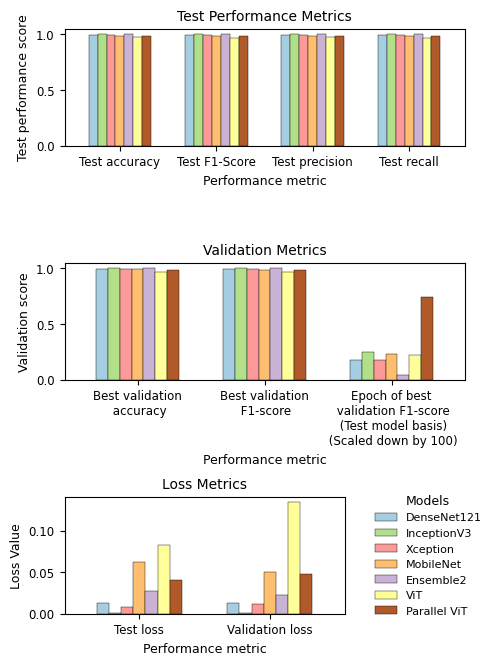

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df_no_augment_original = pd.DataFrame([
    ["Test loss",  0.01262, 0.000673, 0.008479, 0.062872, 0.027141, 0.083006, 0.041049],
    ['Test accuracy', 0.997473, 1, 0.995788, 0.983993, 1, 0.972199, 0.981466],
    ['Test F1-Score', 0.997348, 1, 0.995457, 0.983354, 1, 0.970084, 0.981132],
    ['Test precision', 0.997417, 1, 0.995537, 0.98366, 1, 0.972711, 0.981747],
    ['Test recall', 0.997296, 1, 0.995435, 0.98315, 1, 0.971163, 0.980639],
    ['Validation loss', 0.0131, 0.0009, 0.0117, 0.0498, 0.0224, 0.1344, 0.0479],
    ['Best validation\n accuracy', 0.9972, 1, 0.9965, 0.9894, 1, 0.9704, 0.9831],
    ['Best validation\n F1-score',  0.9972, 1, 0.9963, 0.989, 1, 0.9694, 0.9831],
    ['Epoch of best\n validation F1-score\n (Test model basis)\n (Scaled down by 100)',18, 25, 18, 23, 4, 22, 74 ],
],
    columns=['Performance metric',  'DenseNet121', 'InceptionV3', 'Xception', 'MobileNet', 'Ensemble2', "ViT", 'Parallel ViT',])

df_no_augment_original.iloc[8, 1:] = pd.to_numeric(df_no_augment_original.iloc[8, 1:], errors='coerce') / 100

df_performance_no_loss = df_no_augment_original.iloc[1:5, :].copy()
df_validation_no_loss = df_no_augment_original.iloc[6:, :].copy()

df_test_loss_row = df_no_augment_original.iloc[0:1, :].copy()
df_validation_loss_row = df_no_augment_original.iloc[5:6, :].copy()
df_loss_for_plot = pd.concat([df_test_loss_row, df_validation_loss_row])

fig, axs = plt.subplots(3, 1, figsize=(5, 7.5))

df_performance_no_loss.plot(x='Performance metric', kind='bar', stacked=False, colormap='Paired',
                               edgecolor='black', width=0.65, linewidth=0.3, ax=axs[0], legend=False)
axs[0].set_ylabel("Test performance score", fontsize=9)
axs[0].set_xticklabels(df_performance_no_loss['Performance metric'], rotation=0, fontsize=8.5)
axs[0].set_xlabel(axs[0].get_xlabel(), fontsize=9)
axs[0].set_title('Test Performance Metrics', fontsize=10)
axs[0].tick_params(axis='y', labelsize=8.5)

df_validation_no_loss.plot(x='Performance metric', kind='bar', stacked=False, colormap='Paired',
                               edgecolor='black', width=0.65, linewidth=0.3, ax=axs[1], legend=False)
axs[1].set_ylabel("Validation score", fontsize=9)
axs[1].set_xticklabels(df_validation_no_loss['Performance metric'], rotation=0, fontsize=8.5)
axs[1].set_xlabel(axs[1].get_xlabel(), fontsize=9)
axs[1].set_title('Validation Metrics', fontsize=10)
axs[1].tick_params(axis='y', labelsize=8.5)

df_loss_for_plot.plot(x='Performance metric', kind='bar', stacked=False, colormap='Paired',
                               edgecolor='black', width=0.65, linewidth=0.3, ax=axs[2], legend=False)
axs[2].set_ylabel("Loss Value", fontsize=9)
axs[2].set_xticklabels(df_loss_for_plot['Performance metric'], rotation=0, fontsize=8.5)
axs[2].set_xlabel(axs[2].get_xlabel(), fontsize=9)
axs[2].set_title('Loss Metrics', fontsize=10)
axs[2].tick_params(axis='y', labelsize=8.5)

plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.93, hspace=1)

pos_axs2_original = axs[2].get_position()

new_axs2_width = pos_axs2_original.width * 0.7
axs[2].set_position([pos_axs2_original.x0,
                     pos_axs2_original.y0,
                     new_axs2_width,
                     pos_axs2_original.height])

handles, labels = axs[0].get_legend_handles_labels()

legend_gap = 0.04
legend_bbox_x = pos_axs2_original.x0 + new_axs2_width + legend_gap
legend_bbox_y = pos_axs2_original.y0
legend_bbox_width = pos_axs2_original.width * 0.3 - legend_gap
legend_bbox_height = pos_axs2_original.height

fig.legend(handles, labels,
           bbox_to_anchor=(legend_bbox_x, legend_bbox_y, legend_bbox_width, legend_bbox_height),
           loc='center left',
           ncol=1,
           fontsize=8,
           title='Models',
           title_fontsize=9,
           frameon=False)

# fig.suptitle('Model Metrics (No Augmentation)', fontsize=12, y=0.98)

plt.savefig('data44_no_augment_combined_metrics.pdf', bbox_inches='tight')

plt.show()


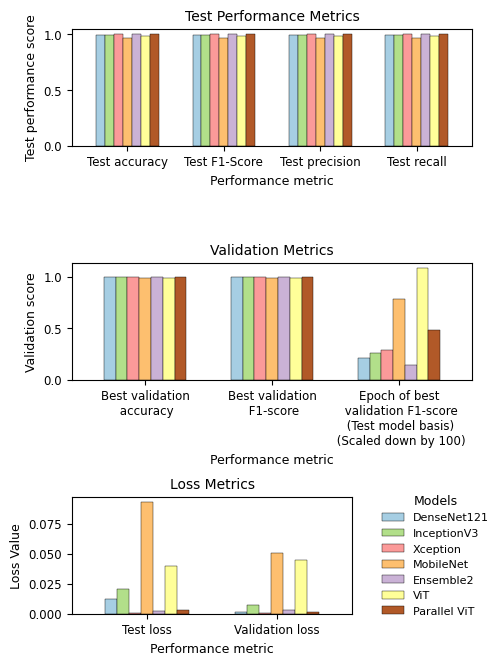

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

df_basic_augment = pd.DataFrame([
    ["Test loss", 0.011892, 0.020647, 0.000351, 0.09278, 0.002129, 0.039388, 0.002691],
    ['Test accuracy',0.994945, 0.99326, 1, 0.964617, 1, 0.989048, 0.999158],
    ['Test F1-Score',0.99491, 0.99321, 1, 0.96442, 1, 0.98529, 0.998828],
    ['Test precision', 0.99503, 0.99402, 1, 0.96584, 1, 0.98905, 0.999214],
    ['Test recall', 0.99481, 0.99249, 1, 0.96369, 1, 0.98879, 0.999042],
    ['Validation loss', 0.0013, 0.007, 0.0004, 0.0505, 0.0032, 0.0447, 0.0012],
    ['Best validation\n accuracy', 1, 0.9993, 1, 0.9838, 1, 0.9859, 1],
    ['Best validation\n F1-score',1, 0.9993, 1, 0.9841, 1, 0.9861, 1],
    ['Epoch of best\n validation F1-score\n (Test model basis)\n (Scaled down by 100)',21, 26, 29, 78, 14, 108, 48 ],
],
    columns=['Performance metric',  'DenseNet121', 'InceptionV3', 'Xception', 'MobileNet', 'Ensemble2', "ViT", 'Parallel ViT',])

df_basic_augment.iloc[8, 1:] = pd.to_numeric(df_basic_augment.iloc[8, 1:], errors='coerce') / 100

df_performance_no_loss = df_basic_augment.iloc[1:5, :].copy()
df_validation_no_loss = df_basic_augment.iloc[6:, :].copy()

df_test_loss_row = df_basic_augment.iloc[0:1, :].copy()
df_validation_loss_row = df_basic_augment.iloc[5:6, :].copy()
df_loss_for_plot = pd.concat([df_test_loss_row, df_validation_loss_row])

fig, axs = plt.subplots(3, 1, figsize=(5, 7.5))

df_performance_no_loss.plot(x='Performance metric', kind='bar', stacked=False, colormap='Paired',
                               edgecolor='black', width=0.65, linewidth=0.3, ax=axs[0], legend=False)
axs[0].set_ylabel("Test performance score", fontsize=9)
axs[0].set_xticklabels(df_performance_no_loss['Performance metric'], rotation=0, fontsize=8.5)
axs[0].set_xlabel(axs[0].get_xlabel(), fontsize=9)
axs[0].set_title('Test Performance Metrics', fontsize=10)
axs[0].tick_params(axis='y', labelsize=8.5)

df_validation_no_loss.plot(x='Performance metric', kind='bar', stacked=False, colormap='Paired',
                               edgecolor='black', width=0.65, linewidth=0.3, ax=axs[1], legend=False)
axs[1].set_ylabel("Validation score", fontsize=9)
axs[1].set_xticklabels(df_validation_no_loss['Performance metric'], rotation=0, fontsize=8.5)
axs[1].set_xlabel(axs[1].get_xlabel(), fontsize=9)
axs[1].set_title('Validation Metrics', fontsize=10)
axs[1].tick_params(axis='y', labelsize=8.5)

df_loss_for_plot.plot(x='Performance metric', kind='bar', stacked=False, colormap='Paired',
                               edgecolor='black', width=0.65, linewidth=0.3, ax=axs[2], legend=False)
axs[2].set_ylabel("Loss Value", fontsize=9)
axs[2].set_xticklabels(df_loss_for_plot['Performance metric'], rotation=0, fontsize=8.5)
axs[2].set_xlabel(axs[2].get_xlabel(), fontsize=9)
axs[2].set_title('Loss Metrics', fontsize=10)
axs[2].tick_params(axis='y', labelsize=8.5)

plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.93, hspace=1)

pos_axs2_original = axs[2].get_position()

new_axs2_width = pos_axs2_original.width * 0.7
axs[2].set_position([pos_axs2_original.x0,
                     pos_axs2_original.y0,
                     new_axs2_width,
                     pos_axs2_original.height])

handles, labels = axs[0].get_legend_handles_labels()

legend_gap = 0.04
legend_bbox_x = pos_axs2_original.x0 + new_axs2_width + legend_gap
legend_bbox_y = pos_axs2_original.y0
legend_bbox_width = pos_axs2_original.width * 0.3 - legend_gap
legend_bbox_height = pos_axs2_original.height

fig.legend(handles, labels,
           bbox_to_anchor=(legend_bbox_x, legend_bbox_y, legend_bbox_width, legend_bbox_height),
           loc='center left',
           ncol=1,
           fontsize=8,
           title='Models',
           title_fontsize=9,
           frameon=False)

# fig.suptitle('Model Metrics (Basic Augmentation)', fontsize=12, y=0.98)

plt.savefig('data44_basic_augment_combined_metrics.pdf', bbox_inches='tight')

plt.show()


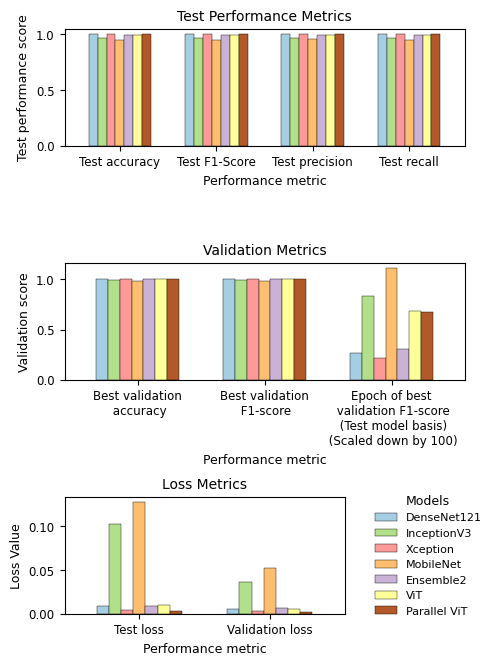

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

df_all_augment = pd.DataFrame([
    ["Test loss", 0.008551, 0.103291, 0.004672, 0.127715, 0.009337, 0.010119, 0.002687],
    ['Test accuracy', 0.998315, 0.966302, 0.998315, 0.95198, 0.99663, 0.99326, 0.999158],
    ['Test F1-Score', 0.998322, 0.966895, 0.998109, 0.951, 0.996813, 0.99229, 0.99923],
    ['Test precision',0.998313, 0.969262, 0.998148, 0.956646, 0.996682, 0.992565, 0.99916 ],
    ['Test recall', 0.998334, 0.965216, 0.998084, 0.948761, 0.996956, 0.994135, 0.999158],
    ['Validation loss',0.0057, 0.0363, 0.0027, 0.0519, 0.0066, 0.0053, 0.0017],
    ['Best validation\n accuracy',1, 0.9894, 1, 0.9817, 1, 0.9993, 1],
    ['Best validation\n F1-score',1, 0.9895, 1, 0.9821, 1, 0.9993, 1],
    ['Epoch of best\n validation F1-score\n (Test model basis)\n (Scaled down by 100)', 27, 83, 22, 111, 31, 68, 67],
],
    columns=['Performance metric',  'DenseNet121', 'InceptionV3', 'Xception', 'MobileNet', 'Ensemble2',  "ViT", 'Parallel ViT',])

df_all_augment.iloc[8, 1:] = pd.to_numeric(df_all_augment.iloc[8, 1:], errors='coerce') / 100

df_performance_no_loss = df_all_augment.iloc[1:5, :].copy()
df_validation_no_loss = df_all_augment.iloc[6:, :].copy()

df_test_loss_row = df_all_augment.iloc[0:1, :].copy()
df_validation_loss_row = df_all_augment.iloc[5:6, :].copy()
df_loss_for_plot = pd.concat([df_test_loss_row, df_validation_loss_row])

fig, axs = plt.subplots(3, 1, figsize=(5, 7.5))

df_performance_no_loss.plot(x='Performance metric', kind='bar', stacked=False, colormap='Paired',
                               edgecolor='black', width=0.65, linewidth=0.3, ax=axs[0], legend=False)
axs[0].set_ylabel("Test performance score", fontsize=9)
axs[0].set_xticklabels(df_performance_no_loss['Performance metric'], rotation=0, fontsize=8.5)
axs[0].set_xlabel(axs[0].get_xlabel(), fontsize=9)
axs[0].set_title('Test Performance Metrics', fontsize=10)
axs[0].tick_params(axis='y', labelsize=8.5)

df_validation_no_loss.plot(x='Performance metric', kind='bar', stacked=False, colormap='Paired',
                               edgecolor='black', width=0.65, linewidth=0.3, ax=axs[1], legend=False)
axs[1].set_ylabel("Validation score", fontsize=9)
axs[1].set_xticklabels(df_validation_no_loss['Performance metric'], rotation=0, fontsize=8.5)
axs[1].set_xlabel(axs[1].get_xlabel(), fontsize=9)
axs[1].set_title('Validation Metrics', fontsize=10)
axs[1].tick_params(axis='y', labelsize=8.5)

df_loss_for_plot.plot(x='Performance metric', kind='bar', stacked=False, colormap='Paired',
                               edgecolor='black', width=0.65, linewidth=0.3, ax=axs[2], legend=False)
axs[2].set_ylabel("Loss Value", fontsize=9)
axs[2].set_xticklabels(df_loss_for_plot['Performance metric'], rotation=0, fontsize=8.5)
axs[2].set_xlabel(axs[2].get_xlabel(), fontsize=9)
axs[2].set_title('Loss Metrics', fontsize=10)
axs[2].tick_params(axis='y', labelsize=8.5)

plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.93, hspace=1)

pos_axs2_original = axs[2].get_position()

new_axs2_width = pos_axs2_original.width * 0.7
axs[2].set_position([pos_axs2_original.x0,
                     pos_axs2_original.y0,
                     new_axs2_width,
                     pos_axs2_original.height])

handles, labels = axs[0].get_legend_handles_labels()

legend_gap = 0.04
legend_bbox_x = pos_axs2_original.x0 + new_axs2_width + legend_gap
legend_bbox_y = pos_axs2_original.y0
legend_bbox_width = pos_axs2_original.width * 0.3 - legend_gap
legend_bbox_height = pos_axs2_original.height

fig.legend(handles, labels,
           bbox_to_anchor=(legend_bbox_x, legend_bbox_y, legend_bbox_width, legend_bbox_height),
           loc='center left',
           ncol=1,
           fontsize=8,
           title='Models',
           title_fontsize=9,
           frameon=False)

# fig.suptitle('Model Metrics (All Augmentations)', fontsize=12, y=0.98)

plt.savefig('data44_all_augment_combined_metrics.pdf', bbox_inches='tight')

plt.show()


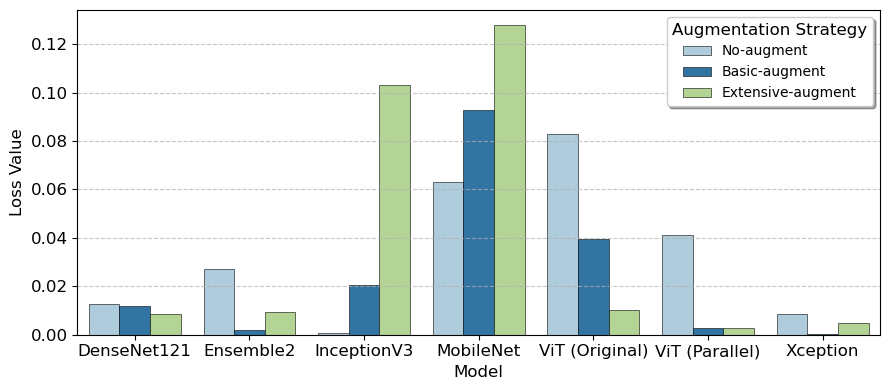

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

MobileNet_df = pd.DataFrame([
    ['No-augment', 0.062872, 0.983993, 0.983354, 0.98366, 0.98315],
    ['Basic-augment', 0.09278, 0.964617, 0.96442, 0.96584, 0.96369],
    ['Extensive-augment', 0.127715, 0.95198, 0.95100, 0.956646, 0.948761]],
    columns=['Train data', 'Loss', 'Accuracy', 'F1-Score', 'Precision', 'Recall' ])

DenseNet121_df = pd.DataFrame([
    ['No-augment', 0.01262, 0.997473, 0.997348, 0.997417, 0.997296],
    ['Basic-augment', 0.011892, 0.994945, 0.99491, 0.99503, 0.99481],
    ['Extensive-augment', 0.008551, 0.998315, 0.998322, 0.998313, 0.998334]],
    columns=['Train data', 'Loss', 'Accuracy', 'F1-Score', 'Precision', 'Recall' ])

InceptionV3_df = pd.DataFrame([
    ['No-augment', 0.000673, 1, 1, 1, 1],
    ['Basic-augment', 0.020647, 0.99326, 0.99321, 0.99402, 0.99249],
    ['Extensive-augment',0.103291, 0.966302, 0.966895, 0.969262, 0.965216]],
    columns=['Train data', 'Loss', 'Accuracy', 'F1-Score', 'Precision', 'Recall'])

Xception_df = pd.DataFrame([
    ['No-augment', 0.008479, 0.995788, 0.995457, 0.995537, 0.995435],
    ['Basic-augment', 0.000351, 1, 1, 1, 1],
    ['Extensive-augment', 0.004672, 0.998315, 0.998109, 0.998148, 0.998084]],
    columns=['Train data', 'Loss', 'Accuracy', 'F1-Score', 'Precision', 'Recall' ])

original_vit_df = pd.DataFrame([
    ['No-augment', 0.083006, 0.972199, 0.970084, 0.972711, 0.971163],
    ['Basic-augment', 0.039388, 0.989048, 0.98529, 0.98905, 0.98879],
    ['Extensive-augment', 0.010119, 0.99326, 0.99229, 0.992565, 0.994135]],
    columns=['Train data', 'Loss', 'Accuracy', 'F1-Score', 'Precision', 'Recall' ])

parallel_vit_df = pd.DataFrame([
    ['No-augment', 0.041049, 0.981466, 0.981132, 0.981747, 0.980639],
    ['Basic-augment',0.002691, 0.999158, 0.998828, 0.999214, 0.999042],
    ['Extensive-augment', 0.002687, 0.999158, 0.99923, 0.99916, 0.999158]],
    columns=['Train data', 'Loss', 'Accuracy', 'F1-Score', 'Precision', 'Recall' ])

Ensemble2_df = pd.DataFrame([
    ['No-augment',0.027141, 1, 1, 1, 1],
    ['Basic-augment',0.002129, 1, 1, 1, 1],
    ['Extensive-augment', 0.009337, 0.99663, 0.996813, 0.996682, 0.996411]],
    columns=['Train data', 'Loss', 'Accuracy', 'F1-Score', 'Precision', 'Recall' ])

result_collection= {'MobileNet':MobileNet_df,  "DenseNet121":DenseNet121_df,
                      'InceptionV3':InceptionV3_df, 'Xception':Xception_df,
                      'ViT (Original)':original_vit_df,
                      'ViT (Parallel)':parallel_vit_df,
                      'Ensemble2':Ensemble2_df}

for model_key in result_collection:
    df = result_collection[model_key]
    for col in ['Loss', 'Accuracy', 'F1-Score', 'Precision', 'Recall']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    result_collection[model_key] = df

loss_data_list = []
for model_key, df_model in result_collection.items():
    if not df_model.empty and 'Loss' in df_model.columns and 'Train data' in df_model.columns:
        for _, row in df_model.iterrows():
            if pd.notna(row['Loss']):
                loss_data_list.append({
                    'Model': model_key,
                    'Augmentation': row['Train data'],
                    'Loss': row['Loss']
                })

collated_loss_df = pd.DataFrame(loss_data_list)

if not collated_loss_df.empty:
    augmentation_categories = ['No-augment', 'Basic-augment', 'Extensive-augment']
    collated_loss_df['Augmentation'] = pd.Categorical(collated_loss_df['Augmentation'],
                                                      categories=augmentation_categories,
                                                      ordered=True)
    collated_loss_df.sort_values(by=['Model', 'Augmentation'], inplace=True)

    fig_loss, ax_loss = plt.subplots(figsize=(9, 4))

    num_augmentation_groups = len(augmentation_categories)
    palette_colors = mpl.cm.Paired.colors[:num_augmentation_groups]

    sns.barplot(x='Model', y='Loss', hue='Augmentation', data=collated_loss_df,
                ax=ax_loss, palette=palette_colors, edgecolor='black', linewidth=0.4)

    ax_loss.set_ylabel('Loss Value', fontsize=12)
    ax_loss.set_xlabel('Model', fontsize=12)

    ax_loss.tick_params(axis='x', rotation=0, labelsize=12)
    plt.setp(ax_loss.get_xticklabels(), ha="center", rotation_mode="anchor")
    ax_loss.tick_params(axis='y', labelsize=12)

    ax_loss.legend(title='Augmentation Strategy', loc='upper right', shadow=True,
                   fontsize='medium', title_fontsize='12')

    ax_loss.grid(axis='y', linestyle='--', alpha=0.7)

    fig_loss.tight_layout()
    plt.savefig('data44_all_models_loss_by_augmentation.pdf', bbox_inches='tight')
    plt.show()
else:
    print("No valid loss data was found to generate the plot.")
